In [1]:
from sklearn.ensemble import RandomForestClassifier
from pickle import dump, load
from utils import Dataset, one_vs_all, plot_roc, get_prob_and_pred

import pandas as pd
import plotly.express as px

from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
hp = {
    
}

In [3]:
with open("data/train_ds.pkl", "rb") as f:
    ds = load(f)

X, y, names = ds.get_X(), ds.get_y(), ds.get_feature_names()

In [4]:
with open("data/test_ds.pkl", "rb") as f:
    ds = load(f)

X_test, y_test, names = ds.get_X(), ds.get_y(), ds.get_feature_names()

In [5]:
y, y_test = one_vs_all(y), one_vs_all(y_test)

In [6]:
model = RandomForestClassifier(**hp)

In [7]:
model = model.fit(X, y)

In [8]:
with open("models/first_try", "wb") as f:
    dump(model, f)

In [20]:
y_prob, y_pred = get_prob_and_pred(model, X_test)
auc = roc_auc_score(y_test, y_prob)
accuracy = (y_pred == y_test).mean()

print(f"{auc=}\n{accuracy=}")

auc=0.8605104932876838
accuracy=0.7836139169472502


In [10]:
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [11]:
importance = model.feature_importances_
importance_dict = {}
for name, importance in zip(names, importance):
    # remove numerals from name
    name = "".join([c for c in name if not c.isdigit()])
    if name in list(importance_dict.keys()):
        importance_dict[name] += importance
    else:
        importance_dict[name] = importance
importance_dict_df = {"name": [], "importance": []}
for name, importance in importance_dict.items():
    importance_dict_df["name"].append(name)
    importance_dict_df["importance"].append(importance*100)

df = pd.DataFrame(importance_dict_df).sort_values("importance", ascending=False)
px.pie(df, values="importance", names="name", title="feature importance")

In [12]:
df

,name,importance
2,longitude,28.120446
1,latitude,27.671277
3,population,9.795797
4,waterpoint_type,7.527665
5,extraction_type,7.118235
7,payment,4.833299
6,management,4.086456
9,source,4.030906
0,amount_tsh,3.968859
8,water_quality,2.847060


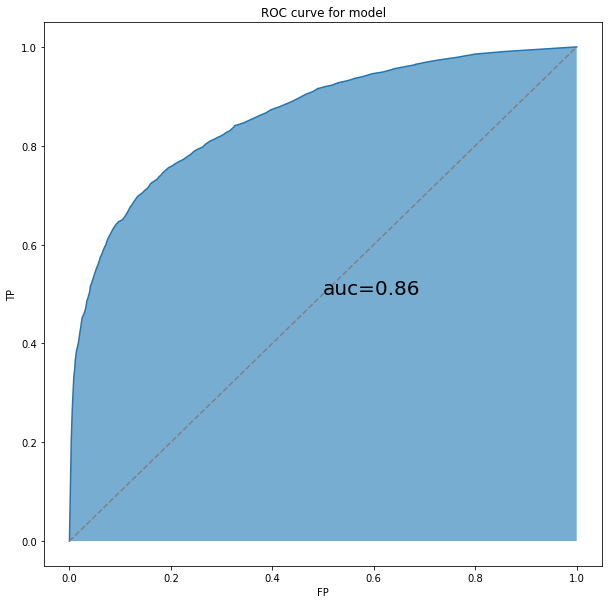

In [13]:
plot_roc(model, X_test, one_vs_all(y_test))

In [15]:
_, _, trs = roc_curve(y_test, y_prob)